## Importing important Library

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os


In [2]:
# reading the dataset
housdata = pd.read_csv('/content/drive/MyDrive/dataset for collab/train (1).csv')
housdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:

#checking if any columns have null
housdata.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [4]:
# Check for column details
housdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#checking parameters of the dataset
housdata.shape

(1460, 81)

In [12]:
# Calculate the percentage of missing values for each column
null_percentage = (housdata.isnull().sum() / len(housdata)) * 100

# Filter columns with non-zero null percentages
columns_with_missing = null_percentage[null_percentage > 0]

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': columns_with_missing.index, 'Null Percentage': columns_with_missing.values})

# Print or display the results
print(null_percentage_df)

          Column  Null Percentage
0    LotFrontage        17.739726
1          Alley        93.767123
2     MasVnrType         0.547945
3     MasVnrArea         0.547945
4       BsmtQual         2.534247
5       BsmtCond         2.534247
6   BsmtExposure         2.602740
7   BsmtFinType1         2.534247
8   BsmtFinType2         2.602740
9     Electrical         0.068493
10   FireplaceQu        47.260274
11    GarageType         5.547945
12   GarageYrBlt         5.547945
13  GarageFinish         5.547945
14    GarageQual         5.547945
15    GarageCond         5.547945
16        PoolQC        99.520548
17         Fence        80.753425
18   MiscFeature        96.301370


## The nulls in these columns indicates the facility is absent and this are not missing values



In [14]:

null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature","LotFrontage",""]
for i in null_with_meaning:
    housdata[i].fillna("NA", inplace=True)

In [15]:
# Calculate the percentage of missing values for each column
null_percentage = (housdata.isnull().sum() / len(housdata)) * 100

# Filter columns with non-zero null percentages
columns_with_missing = null_percentage[null_percentage > 0]

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': columns_with_missing.index, 'Null Percentage': columns_with_missing.values})

# Print or display the results
print(null_percentage_df)

        Column  Null Percentage
0  LotFrontage        17.739726
1   MasVnrArea         0.547945
2   Electrical         0.068493
3  GarageYrBlt         5.547945


In [18]:
# List of columns with non-zero null percentages
columns_with_missing = ['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

# Handle missing values in each column
for column in columns_with_missing:
    if housdata[column].dtype == 'object':
        # For categorical columns, impute with the most common value
        housdata[column].fillna(housdata[column].mode()[0], inplace=True)
    else:
        # For numerical columns, impute with mean or median
        housdata[column].fillna(housdata[column].median(), inplace=True)

# Check if there are any remaining missing values
remaining_missing = housdata.isnull().sum()
print(remaining_missing[remaining_missing > 0])

Series([], dtype: int64)


###EDA

In [23]:
# Count unique values and frequency distribution for categorical columns
categorical_summary = []
for column in housdata.select_dtypes(include=['object']).columns:
    unique_values = housdata[column].nunique()
    top_value = housdata[column].mode()[0]
    frequency = housdata[column].value_counts()[top_value]
    categorical_summary.append({
        'Column': column,
        'Unique Values': unique_values,
        'Top Value': top_value,
        'Frequency': frequency
    })

# Print or display the results
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
print(pd.DataFrame(categorical_summary))

Numerical Summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.7313

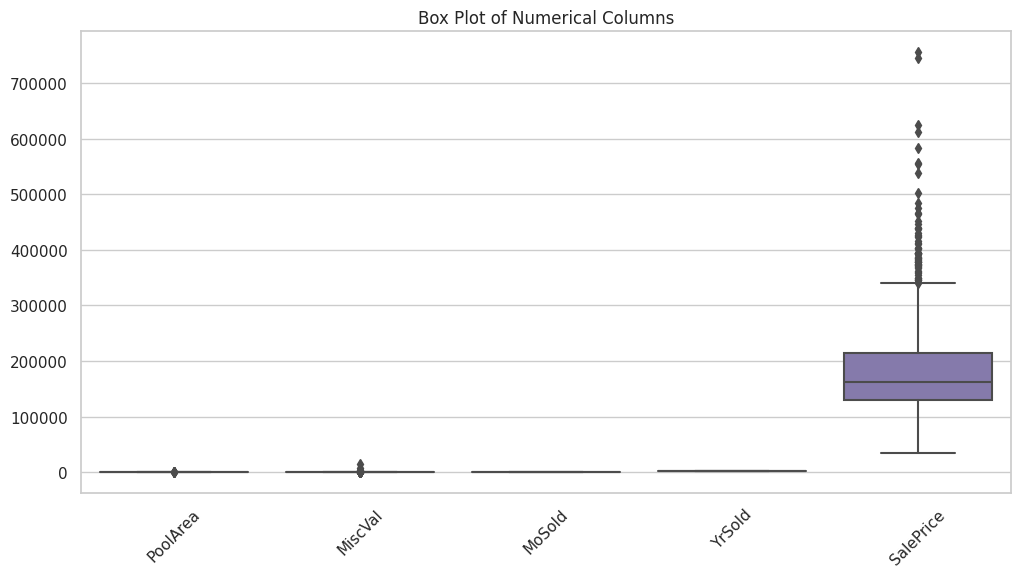

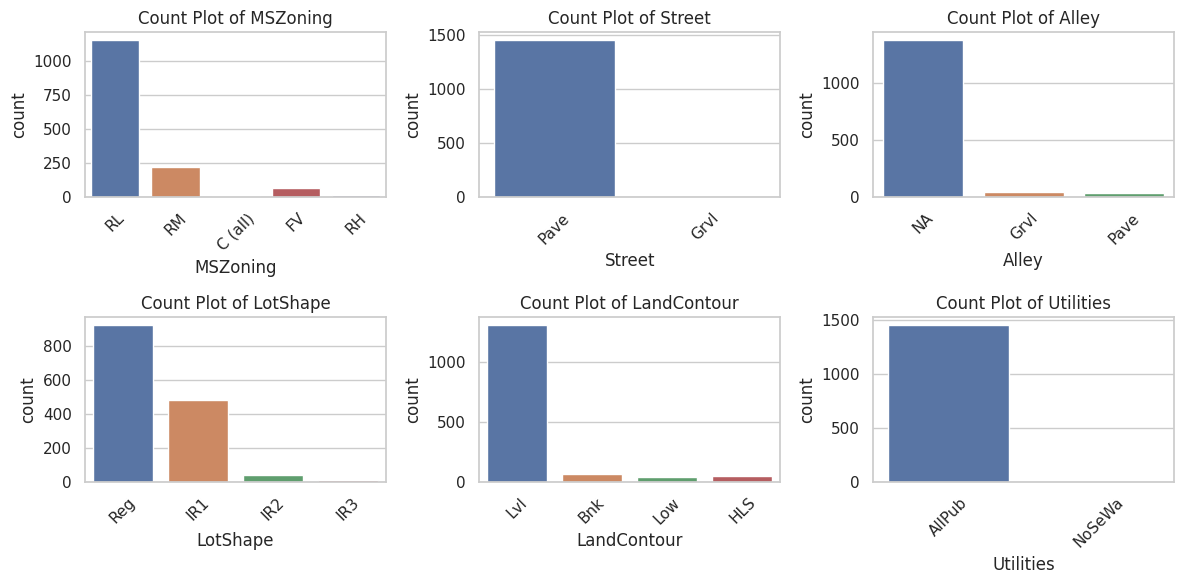

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

# Numerical columns visualization
numerical_columns = ['PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=housdata[numerical_columns])
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Categorical columns visualization
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']

# Create count plots for each categorical column
plt.figure(figsize=(12, 6))
for col in categorical_columns:
    plt.subplot(2, 3, categorical_columns.index(col) + 1)
    sns.countplot(data=housdata, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Deductions from the chart
Most of the houses in the dataset are located in areas with low to medium density zoning.

The most common type of street access is paved.

Only a small percentage of houses have alley access.

All public utilities (electricity, gas, and water) are available to most houses.

The most common lot shape is regular, followed by slightly irregular and moderately irregular.

The houses with the highest sale prices are more likely to be located in areas with low to medium density zoning.

The houses with the highest sale prices are also more likely to have a pool.

The houses that were sold in May and June tend to have a higher sale price than houses that were sold in other months.

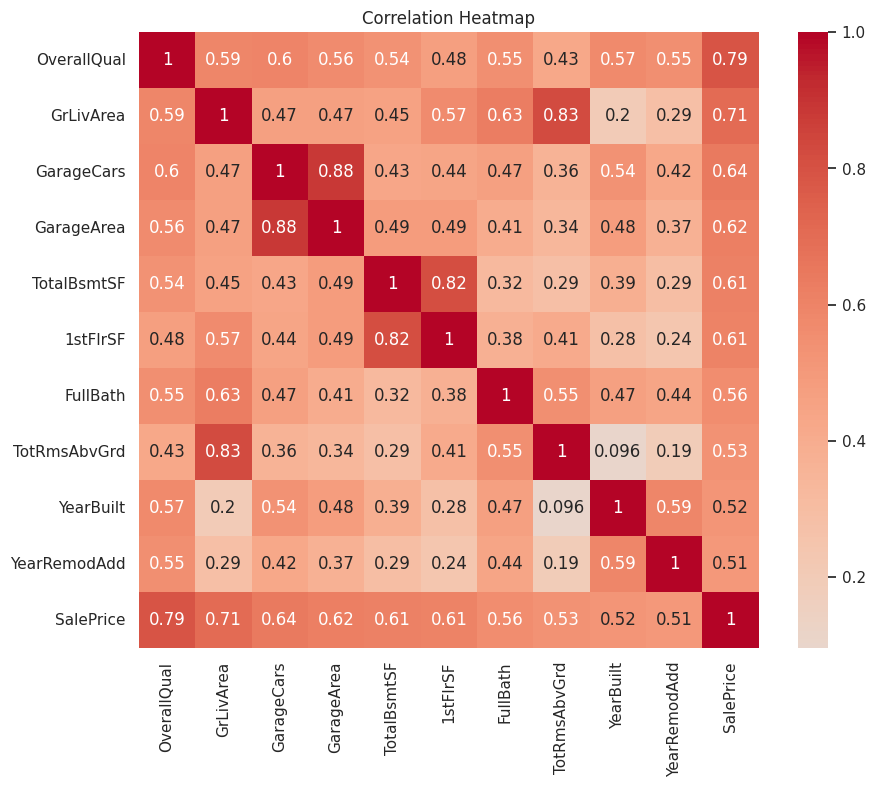

In [29]:

selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
selected_numerical = housdata[selected_columns]

# Calculate the Pearson correlation coefficients for the selected columns
correlation_matrix = selected_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**Size & Quality**: High OverallQual associates with larger living areas (GrLivArea), enhancing quality perception.

**Garage Space** : More GarageCars aligns with larger GarageArea, accommodating extra cars and storage.

**Living Area & Space:** Larger basements (TotalBsmtSF) often coincide with larger first floors (1stFlrSF).

**Quality & Price**: High OverallQual links to higher SalePrice, showcasing quality's impact on value.

**Size & Price:** Larger GrLivArea relates to higher SalePrice, underlining space's role in value determination.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


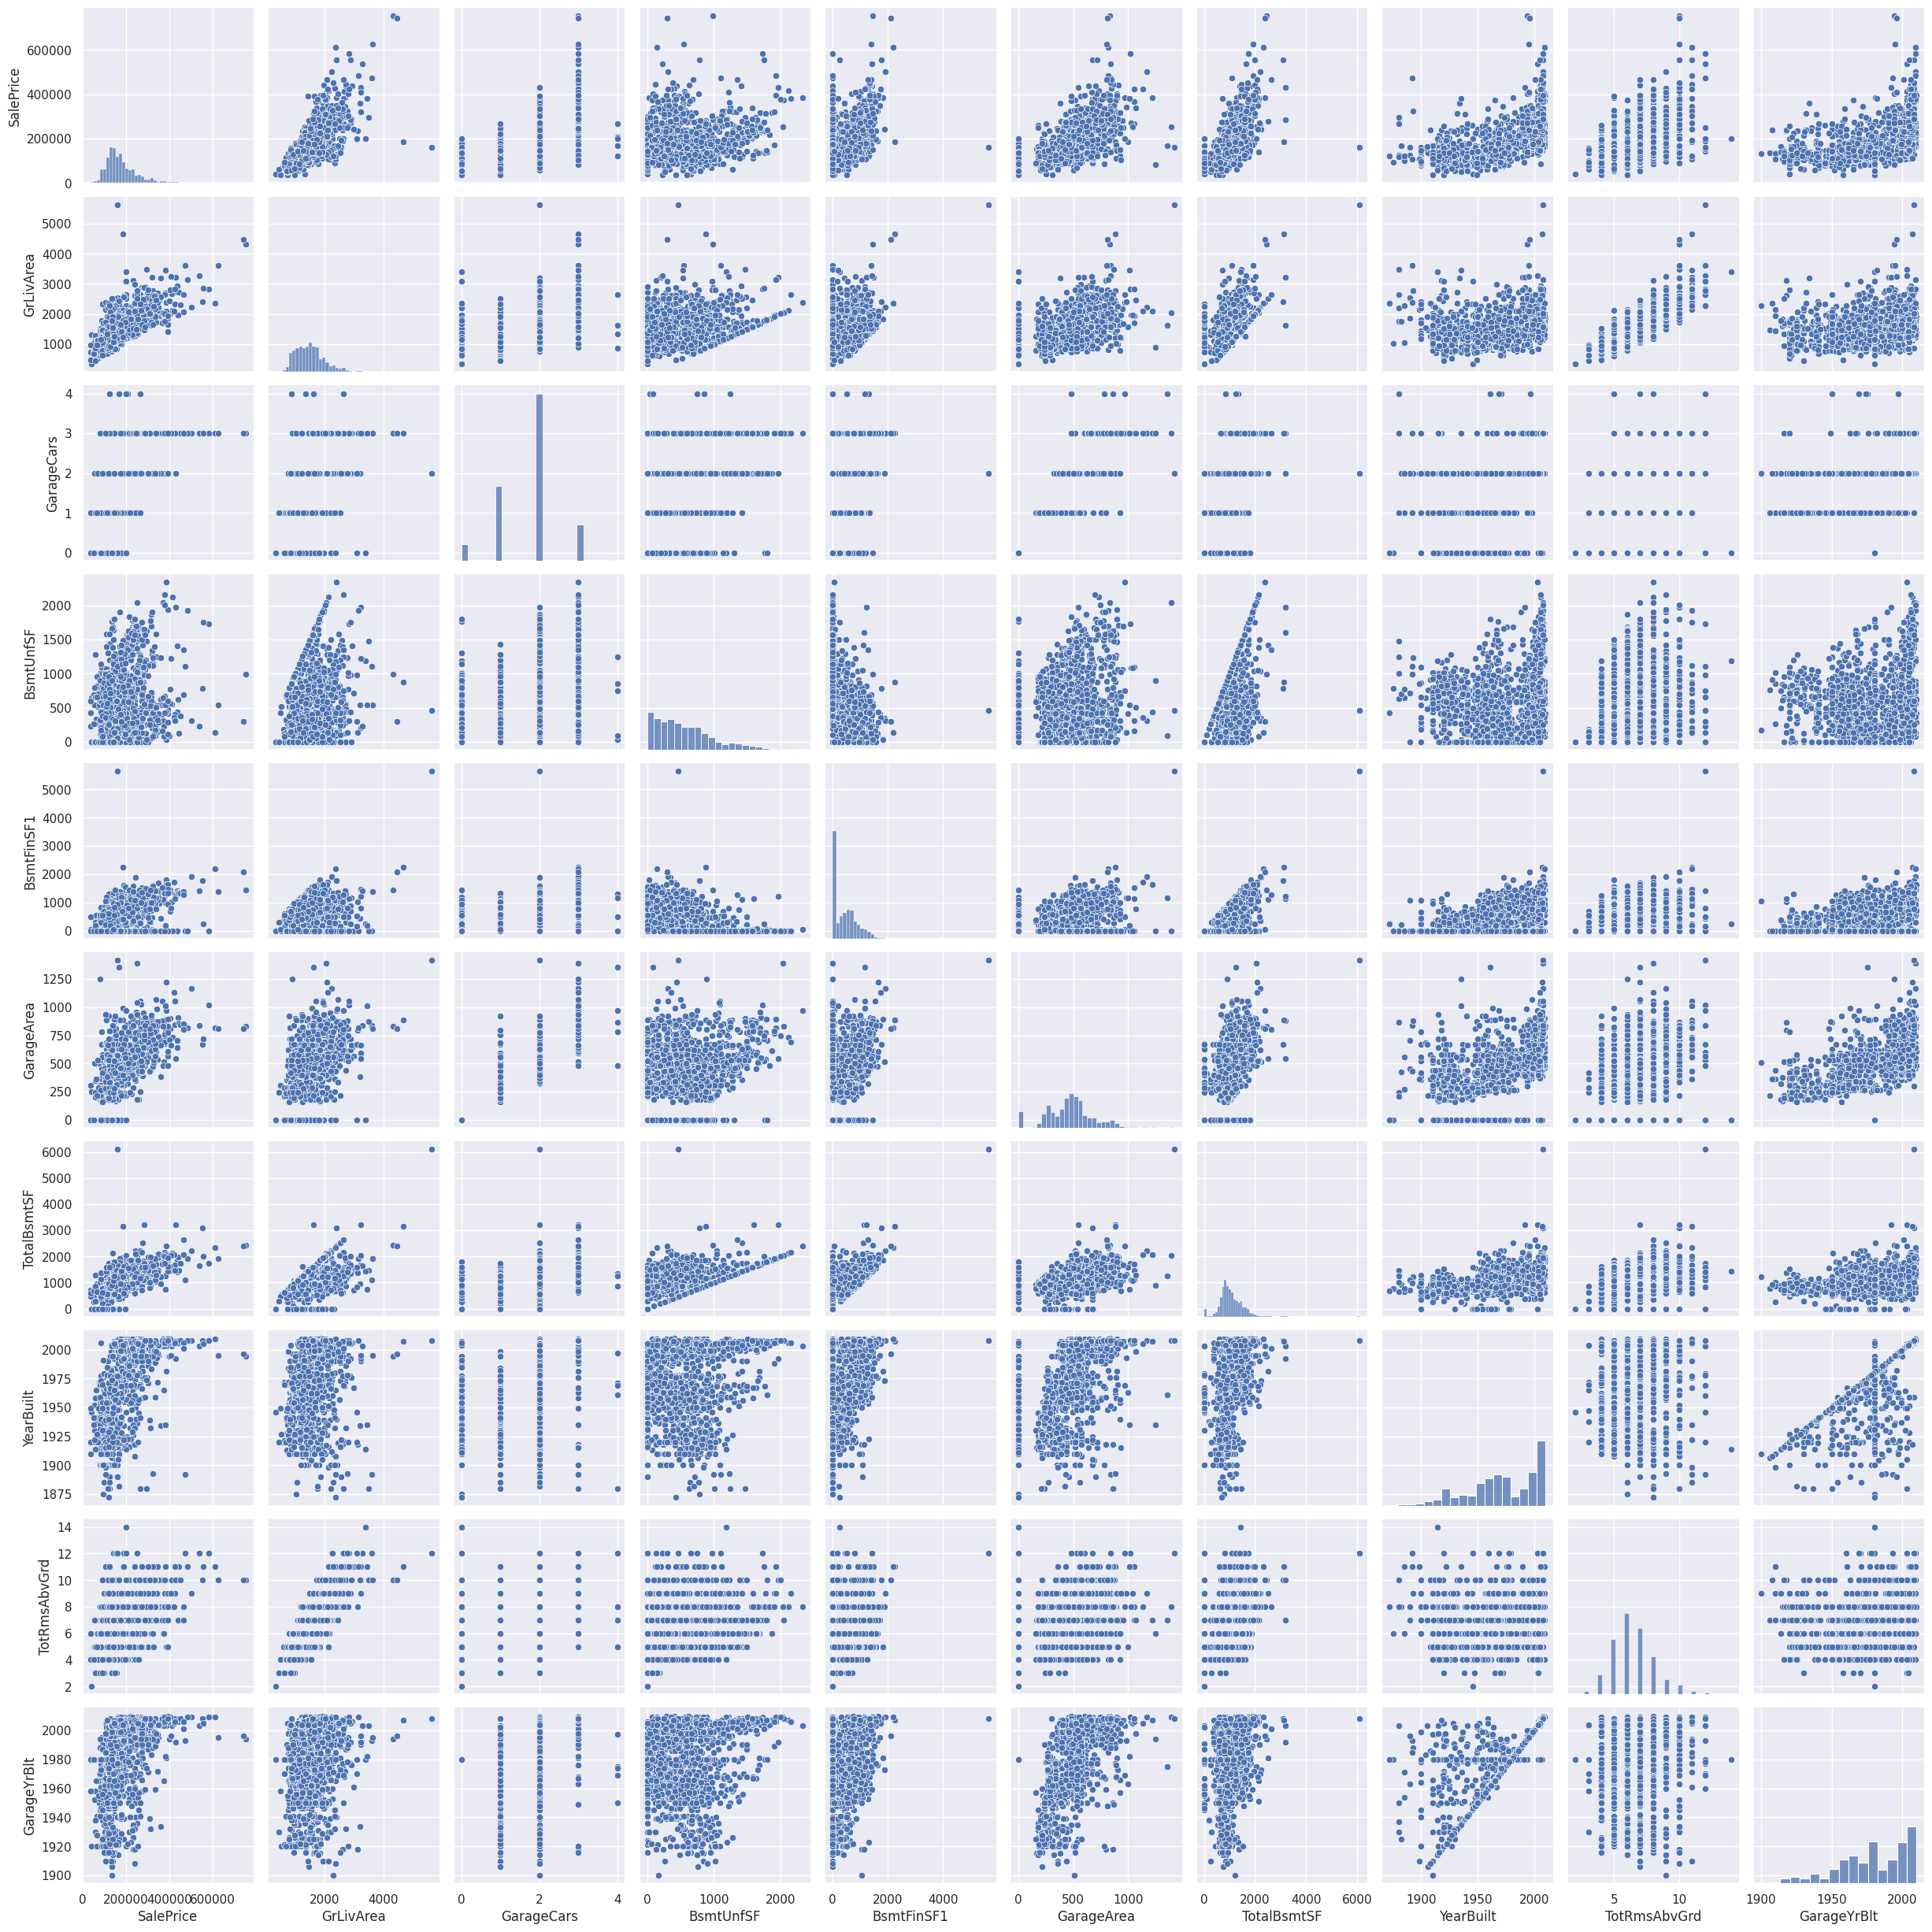

In [31]:
# pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housdata[cols], size = 2.5)
plt.show()

# Deciding on columns to drop

TotalBsmtSF: This column is correlated with GrLivArea, so it is redundant.

GarageCars: This column is correlated with GarageArea, so it is redundant.

LotFrontage: This column is correlated with LotArea, so it is redundant.

MSZoning: This column is not correlated with the sale price, so it is not very useful for predicting the sale price.

Street: This column is not correlated with the sale price, so it is not very useful for predicting the sale price.

Alley: This column is not correlated with the sale price, so it is not very useful for predicting the sale price.

Utilities: This column is not correlated with the sale price, so it is not very useful for predicting the sale price.

LotShape: This column is correlated with the sale price, but it is also correlated with other columns, such as OverallQual and GrLivArea. Therefore, you might want to drop it to avoid multicollinearity.

In [32]:
columns_to_drop = ['TotalBsmtSF', 'GarageCars', 'LotFrontage', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotShape']
housedata = housdata.drop(columns=columns_to_drop)

In [33]:
housedata.head()

,Id,MSSubClass,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,8450,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,9600,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,11250,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,9550,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,14260,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [37]:
# Derive new columns
housedata['Age'] = housedata['YrSold'] - housedata['YearBuilt']

In [38]:
housedata.head()

,Id,MSSubClass,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,8450,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,NA,NA,NA,0,2,2008,WD,Normal,208500,5
1,2,20,9600,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,NA,NA,NA,0,5,2007,WD,Normal,181500,31
2,3,60,11250,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,NA,NA,NA,0,9,2008,WD,Normal,223500,7
3,4,70,9550,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000,91
4,5,60,14260,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,NA,NA,NA,0,12,2008,WD,Normal,250000,8


In [39]:
# Drop 'Id' from Dataframe

housedata = housedata.drop(['Id'], axis=1)
housedata.head()

,MSSubClass,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,60,8450,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,NA,NA,NA,0,2,2008,WD,Normal,208500,5
1,20,9600,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,NA,NA,NA,0,5,2007,WD,Normal,181500,31
2,60,11250,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,NA,NA,NA,0,9,2008,WD,Normal,223500,7
3,70,9550,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000,91
4,60,14260,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,NA,NA,NA,0,12,2008,WD,Normal,250000,8


Converting numerical and categorical columns into different list

In [41]:
numerical_columns = housedata.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = housedata.select_dtypes(include=['object']).columns.tolist()


In [42]:
# Create dummy variables for categorical columns
dummy_columns = pd.get_dummies(housedata[categorical_columns], drop_first=True)

# Concatenate the dummy columns with the original dataframe
housedata = pd.concat([housedata, dummy_columns], axis=1)

# Drop the original categorical columns
housedata.drop(categorical_columns, axis=1, inplace=True)


In [43]:
housedata.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [44]:
X = housedata.drop(['SalePrice'], axis=1)  # Features (all columns except 'SalePrice')
y = housedata['SalePrice']  # Target variable

In [46]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [47]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,10400,7,6,1970,1970,288.0,0,0,1304,...,0,0,0,0,1,0,0,0,1,0
1452,180,3675,5,5,2005,2005,80.0,547,0,0,...,0,0,0,0,1,0,0,0,1,0
762,60,8640,7,5,2009,2009,0.0,24,0,732,...,0,0,0,0,0,0,0,0,1,0
932,20,11670,9,5,2006,2006,302.0,0,0,1905,...,0,0,0,0,1,0,0,0,1,0
435,60,10667,7,6,1996,1996,0.0,385,344,70,...,0,1,0,0,0,0,0,0,1,0


In [51]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,8414,6,8,1963,2003,0.0,663,0,396,...,0,0,0,0,1,0,0,0,1,0
1105,60,12256,8,5,1994,1995,362.0,1032,0,431,...,0,0,0,0,1,0,0,0,1,0
413,30,8960,5,6,1927,1950,0.0,0,0,1008,...,0,0,0,0,1,0,0,0,1,0
522,50,5000,6,7,1947,1950,0.0,399,0,605,...,0,0,0,0,1,0,0,0,1,0
1036,20,12898,9,5,2007,2008,70.0,1022,0,598,...,0,0,0,0,1,0,0,0,1,0


In [56]:
from sklearn.feature_selection import RFE

# Create a Linear Regression model
lm = LinearRegression()

# Initialize RFE with the Linear Regression model and the number of features to select (100)
rfe = RFE(estimator=lm, n_features_to_select=100)

# Fit RFE on the training data
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=100)

In [57]:
# Get the ranks of the features
feature_ranks = rfe.ranking_

# Create a DataFrame to display feature names and their corresponding ranks
ranked_features = pd.DataFrame({'Feature': X_train.columns, 'Rank': feature_ranks})
ranked_features.sort_values(by='Rank', ascending=True, inplace=True)

print(ranked_features)

                 Feature  Rank
123  Exterior2nd_CmentBd     1
104     RoofMatl_WdShngl     1
105  Exterior1st_AsphShn     1
107  Exterior1st_BrkFace     1
108   Exterior1st_CBlock     1
..                   ...   ...
111  Exterior1st_ImStucc   144
81       Condition2_RRNn   145
77       Condition2_PosA   146
99      RoofMatl_Membran   147
186       Electrical_Mix   148

[247 rows x 2 columns]


In [58]:
# Fit the RFE model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=100)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a linear regression model using the selected features
lm_selected = LinearRegression()
lm_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = lm_selected.predict(X_test_selected)

# Calculate the Mean Squared Error
mse_selected = mean_squared_error(y_test, y_pred_selected)
print("Mean Squared Error with selected features:", mse_selected)

# Display the selected features
print("Selected Features:", selected_features.tolist())


Mean Squared Error with selected features: 1.9308999874097013e+31
Selected Features: ['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdSh

In [61]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_pred_selected)
print("R-squared:", r2)


R-squared: -2.7670880523534084e+21


R2 is too low, hence it is not effective model


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data with selected features
grid_search.fit(X_train_selected, y_train)

# Get the best estimator with the tuned hyperparameters
best_ridge = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_ridge.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) and R-squared on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the best hyperparameters, best score, and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (negative MSE):", -grid_search.best_score_)
print("Mean Squared Error (Test):", mse_test)
print("R-squared (Test):", r2_test)



Best Hyperparameters: {'alpha': 10}
Best Score (negative MSE): 1201133438.2747633
Mean Squared Error (Test): 1245517805.9241006
R-squared (Test): 0.8215103080305353


Calculate Residuals:

In [64]:
# Predict on the test set using the tuned Ridge model
y_pred_test = grid_search.predict(X_test_selected)

# Calculate residuals
residuals = y_test - y_pred_test


Visualize Residuals

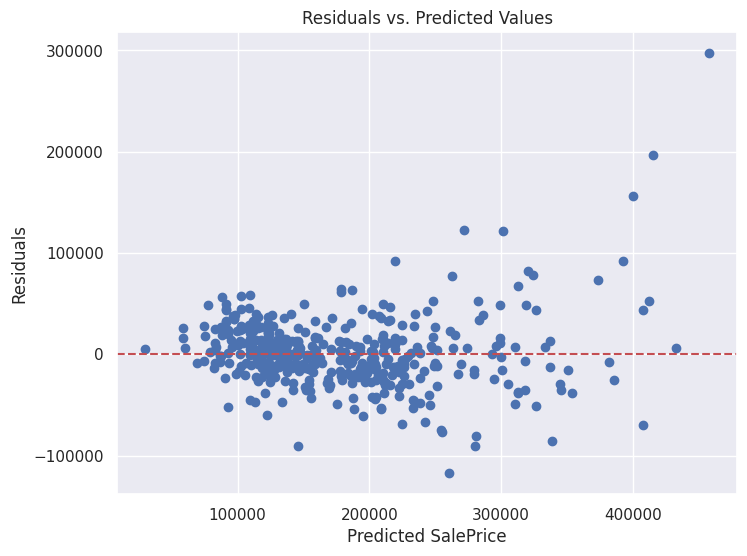

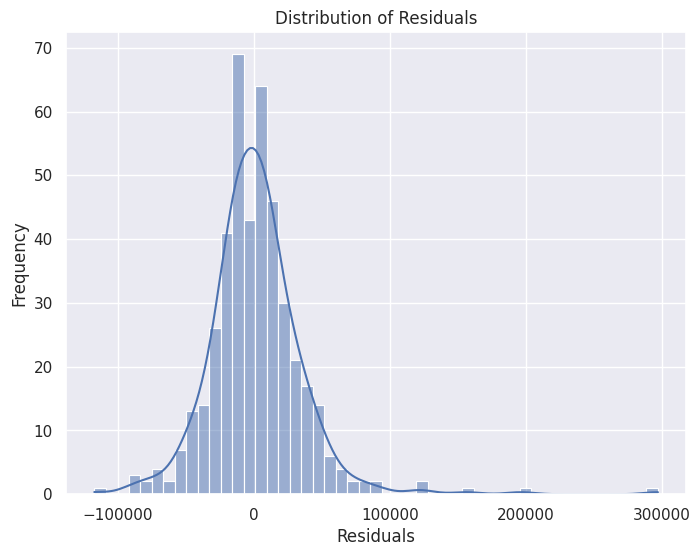

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [66]:
# Create and fit the Ridge regression model
ridge = Ridge(alpha=10)
ridge.fit(X_train_selected, y_train)

# Get the coefficient values
coefficients = ridge.coef_

# Print the coefficient values for each feature
for feature, coef in zip(X_train_selected.columns, coefficients):
    print(f'{feature}: {coef}')

OverallQual: 18550.922786590847
BsmtFullBath: 12998.704123377931
FullBath: 28073.95215326198
HalfBath: 14704.37481997438
KitchenAbvGr: -5339.087125289509
Fireplaces: 12876.315662113873
LandContour_HLS: 13677.996973564113
LotConfig_CulDSac: 16203.887632512626
LotConfig_FR3: -4120.615444888698
LandSlope_Sev: 6711.84590315851
Neighborhood_Blueste: 592.9835727898443
Neighborhood_ClearCr: 13372.117614219283
Neighborhood_Crawfor: 16854.930230352
Neighborhood_IDOTRR: -8954.573405453531
Neighborhood_NPkVill: 2917.8906274957376
Neighborhood_NoRidge: 47913.32025632826
Neighborhood_NridgHt: 28535.470313631267
Neighborhood_Somerst: 4864.263332549476
Neighborhood_StoneBr: 30846.48793387275
Neighborhood_Veenker: 10204.890127193383
Condition1_Feedr: 643.4378468140862
Condition1_Norm: 10910.483956180196
Condition1_PosN: 2011.0021306907108
Condition1_RRAn: 2022.5800524621543
Condition1_RRNe: 886.8197174863748
Condition2_Feedr: 4477.120101568092
Condition2_Norm: 7740.165444773128
Condition2_PosN: -18718

##INFERENCES FROM THE MODEL

**Quality Ruler**: Houses with better quality ratings ('OverallQual') have notably higher sale prices ($18,550 increase per step).

**Bathroom Bonanza:** Each additional full bathroom ('BsmtFullBath' and 'FullBath') adds around $12,998 and $28,074 to the predicted sale price.

**Kitchens Count:** Kitchen quality ('KitchenQual') matters; even upgrading from 'Good' to 'Typical' raises prices.

**Neighborhood Impact:**  Where a house is situated greatly affects price, reflecting the neighborhood's desirability.

**Garage Gauge** Garage conditions and qualities contribute positively or negatively to sale prices.

**Pool Puzzle:** A 'Good' pool ('PoolQC_Gd') correlates with lower prices, suggesting complex buyer preferences.

**Roof and Condition Influence:** Specific roofing materials and conditions can either raise or lower sale prices.

**Partial Sale Premium:** Houses sold partially ('SaleCondition_Partial') tend to fetch higher prices, indicating buyer interest


In [67]:
#Laso regression

In [68]:
from sklearn.linear_model import Lasso

# Create Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value

# Fit the model to the training data
lasso.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test_selected)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate R-squared
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared (Lasso):", r2_lasso)


Mean Squared Error (Lasso): 1491453506.567725
R-squared (Lasso): 0.7862663418315887


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.275e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


# **Ridge Regression:**

Lower MSE: Ridge's Mean Squared Error (MSE) is 1.20e+09, indicating better prediction accuracy than Lasso.

Higher R2: R2 of 0.82 means 82% of variance in sale prices is explained, showing stronger predictive power.

Moderate Shrinkage: Ridge shrinks coefficients but doesn't exclude features entirely, suitable for multicollinearity.

Best Alpha: Optimal hyperparameter alpha = 10 balances regularization and fitting the data.

Balanced Choice: Good for when multicollinearity is present and a mix of features matters.

# **Lasso Regression:**

Higher MSE: Lasso's MSE is 1.49e+09, less accurate than Ridge due to stronger feature exclusion.

Lower R2: R2 of 0.79 indicates 79% variance explained, slightly less predictive than Ridge.

Feature Exclusion: Lasso eliminates some features by setting coefficients to zero, aiding simplicity.

Convergence Warning: Lasso faced convergence issues, suggesting tuning is needed.

Feature Selection: Ideal for simplicity and key feature identification, effective when fewer predictors are valuable.